In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [ ]:
data = pd.read_csv('data_for_lr.csv')

data = data.dropna() # By default, dropna() removes any row that contains at least one missing value across all columns.

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [ ]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        # initially assigning random value of parameter (m and c)
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        # y = mx+c
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        #cost function - the Mean Squared Error (MSE) cost function is employed, which calculates the average of the squared errors between the predicted values and actual value
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        
        # it is the derivative of mean squared error 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = [] 

        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data') 

        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            predictions = self.forward_propagation(train_input) 
            cost = self.cost_function(predictions, train_output) 
            derivatives = self.backward_propagation(train_input, train_output, predictions) 
            self.update_parameters(derivatives, learning_rate) 
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c']) 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 
            return line, 

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss

MovieWriter ffmpeg unavailable; using Pillow instead.


Iteration = 1, Loss = 11035.30275180794
Iteration = 1, Loss = 1336.752445847138
Iteration = 1, Loss = 167.9715878999202
Iteration = 1, Loss = 27.120775054442785
Iteration = 2, Loss = 10.146719261167577
Iteration = 3, Loss = 8.101160801825884
Iteration = 4, Loss = 7.854648733047135
Iteration = 5, Loss = 7.824941332750204
Iteration = 6, Loss = 7.821361254419064
Iteration = 7, Loss = 7.820929802721012
Iteration = 8, Loss = 7.820877794799033
Iteration = 9, Loss = 7.820871513982767
Iteration = 10, Loss = 7.820870743781715
Iteration = 11, Loss = 7.820870637671104
Iteration = 12, Loss = 7.820870611591957
Iteration = 13, Loss = 7.820870595158812
Iteration = 14, Loss = 7.820870579889453
Iteration = 15, Loss = 7.820870564761685
Iteration = 16, Loss = 7.820870549652314
Iteration = 17, Loss = 7.820870534546504
Iteration = 18, Loss = 7.820870519442456
Iteration = 19, Loss = 7.820870504339962
Iteration = 20, Loss = 7.820870489238994


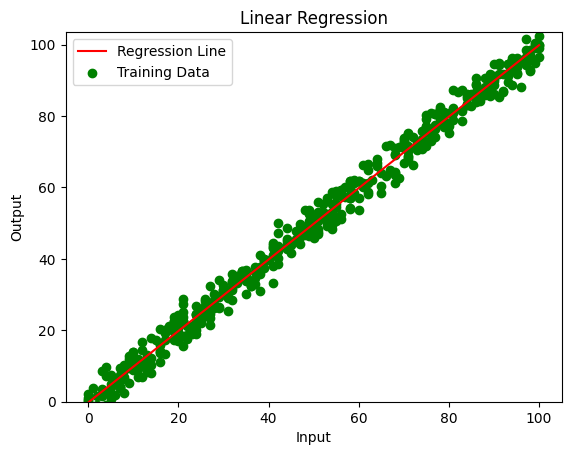

In [8]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

In [12]:
import numpy as np


class LinearRegression:

    def __init__(self, lr = 0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [13]:
pip install LinearRegression

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


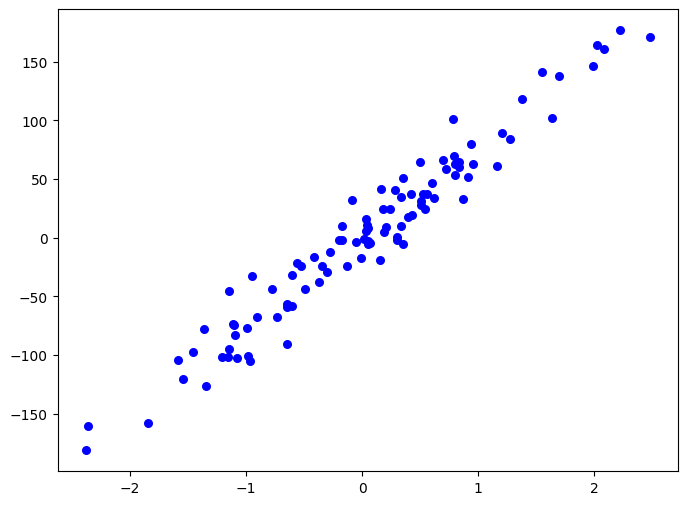

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'lr'

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from LinearRegression import LinearRegression

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

reg = LinearRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()